In [1]:
import sys
sys.path.append("/home/alisa/git/AstroDeepLearning/")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from ADL.visual import get_ax
import os

<ipython-input-1-efa4caf553b0>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Построение графиков precision-recall для полученных каталогов

In [2]:
def setup_ax(ax):
    ax.grid()
    ax.legend()

In [3]:
field_names_dict = {"": "eb20", "_val": "val", "_es": "east south val", "_en": "east north val", "_eb20_val": "eb20 val"}
tags = ["", "_val", "_es", "_en", "_eb20_val"]

In [5]:
class CatalogMetr:
    all_colors = list(mcolors.BASE_COLORS.keys()) + list(mcolors.TABLEAU_COLORS.keys()) + \
                    list(mcolors.CSS4_COLORS.keys())
    used_colors = []
    def __init__(self, path0: str, path1: str = None, color: str = None, 
                 linestyle: str = "solid", other_linestyle: str = "dashed", descr: str = None, other_descr: str = "[radio src]"):
        self.path0 = path0
        if path1 is None and "class" in path0:
            path1 = path0.replace("class0", "class1")
        self.path1 = path1
        if color is None:
            color = list(set(CatalogMetr.all_colors).difference(CatalogMetr.used_colors))[0]
        #else:
        #    if color in CatalogMetr.used_colors:
        #        raise ValueError("Color is already used!")
        CatalogMetr.used_colors.append(color)
        self.color = color
        self.linestyle = linestyle
        self.other_linestyle = other_linestyle
        self.descr = descr
        self.other_descr = other_descr

In [6]:
def show_precision_recall(ax, true_name: str, cm: CatalogMetr = None, tag: str = "", add_other: bool = False):
    path = cm.path0.format(tag)
    det_name = cm.descr
    c = cm.color
    linestyle = cm.linestyle
    df = pd.read_csv(path)
    if not (true_name in list(df) and 'precision_' + true_name in list(df)):
        return
    s, = ax.plot(df[true_name], df['precision_' + true_name], c=c, linestyle=linestyle)
    s.set_label(det_name)
    
    
    if add_other and cm.path1 is not None:
        path = cm.path1.format(tag)
        df = pd.read_csv(path)
        linestyle = cm.other_linestyle
        s, = ax.plot(df[true_name], df['precision_' + true_name], c=c, linestyle=linestyle)
        det_name = cm.descr + cm.other_descr
        s.set_label(det_name)
    
    field_name = field_names_dict[tag]
    ax.set_xlabel("Recall " + true_name + " " + field_name)
    ax.set_ylabel("Precision")
    ax.set_ylim(0, 1)


In [7]:
def show_precision_nobj(ax, true_name: str, cm: CatalogMetr, tag: str = "", add_other: bool = False):
    path = cm.path0.format(tag)
    det_name = cm.descr
    c = cm.color
    linestyle = cm.linestyle
    df = pd.read_csv(path)
    if not ('precision_' + true_name in list(df)):
        return
    s, = ax.plot(df["n_det"], df['precision_' + true_name], c=c, linestyle=linestyle)
    s.set_label(det_name)
    if add_other and cm.path1 is not None:
        path = cm.path1.format(tag)
        df = pd.read_csv(path)
        linestyle = cm.other_linestyle
        s, = ax.plot(df["n_det"], df['precision_' + true_name], c=c, linestyle=linestyle)
        det_name = cm.descr + cm.other_descr
        s.set_label(det_name)
        
    ax.set_xlabel("Number of objects")
    ax.set_ylabel("Precision")

In [8]:
def get_name(s):
    return os.path.basename(s.format(""))[5:-3]

In [10]:
cm_dicts = {
    #"PSZ2": CatalogMetr("/home/alisa/Data/Planck/metr/stat_PSZ2{}.csv", descr="PSZ2"),
    #"SZcatGen": CatalogMetr("/home/alisa/Data/Planck/metr/stat_SZcatgen{}.csv", 
    #                        descr="SZcatGen previous article"),
    #"SZcatAL": CatalogMetr("/home/alisa/Data/Planck/metr/stat_SZcatAL{}.csv", 
    #                       descr="SZcatAL previous article"),
    "Pz9": CatalogMetr("/home/alisa/Data/Planck/metr/stat_Pz9_ep119_step16{}.csv", 
                       descr="8/8", color="b"),
    "Pz9-lfi": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz9-lfi_ep126_step16{}.csv", 
                           descr="8/8 LFI", color="g"),
    "Pz-radio": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz-not-cluster_8-8_ep139_step16{}_class0.csv",
                           descr="8/8 Pz-radio", color="r"),
    "Pz-radio-lfi": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz-not-cluster-lfi_8-8_ep135_step16{}_class0.csv",
                           descr="8/8 Pz-radio LFI", color="c"),
    "Pz-frlfi": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz-frlfi_8-8_ep062_step16{}.csv",
                           descr="8/8 fake lfi retrain", color="m"),
    "Pz-radio-frlfi": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz-not-cluster-frlfi_8-8_ep083_step16{}_class0.csv",
                            descr="8/8 fake lfi Pz-radio", color="y"),
    "Radio": CatalogMetr("/home/alisa/Data/Planck/metr/stat_not-cluster_ep132_step16.csv",
                        descr="8/8 only radio src", linestyle="dashed", color="k"),
    "Pz-radio_8-256": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz-not-cluster_8-256_ep040_step16{}_class0.csv",
                        descr="8/256 Pz-radio"),
    "Pz-radio-lfi_8-256": CatalogMetr("/home/alisa/Data/Planck/metr/stat_pz-not-cluster-lfi_8-256_ep029_step16{}_class0.csv",
                        descr="8/256 Pz-radio LFI"),
    "Al5": CatalogMetr("/home/alisa/Data/Planck/metr/stat_Al5_ep128_step16{}.csv", descr="8/8 next gen",
                      color="r"),
    "Pz9-filtered": CatalogMetr("/home/alisa/Data/Planck/metr/stat_Pz9-filtered_ep119_step16{}.csv", descr="8/8 filtered",
                        linestyle=":", color="b"),
    "Al5-filtered": CatalogMetr("/home/alisa/Data/Planck/metr/stat_Al5-filtered_ep128_step16{}.csv", descr="8/8 filtered next gen",
                               linestyle=":", color="r")
           }

In [11]:
selected_cats = ["Pz9", "Al5", "Pz9-filtered", "Al5-filtered"]

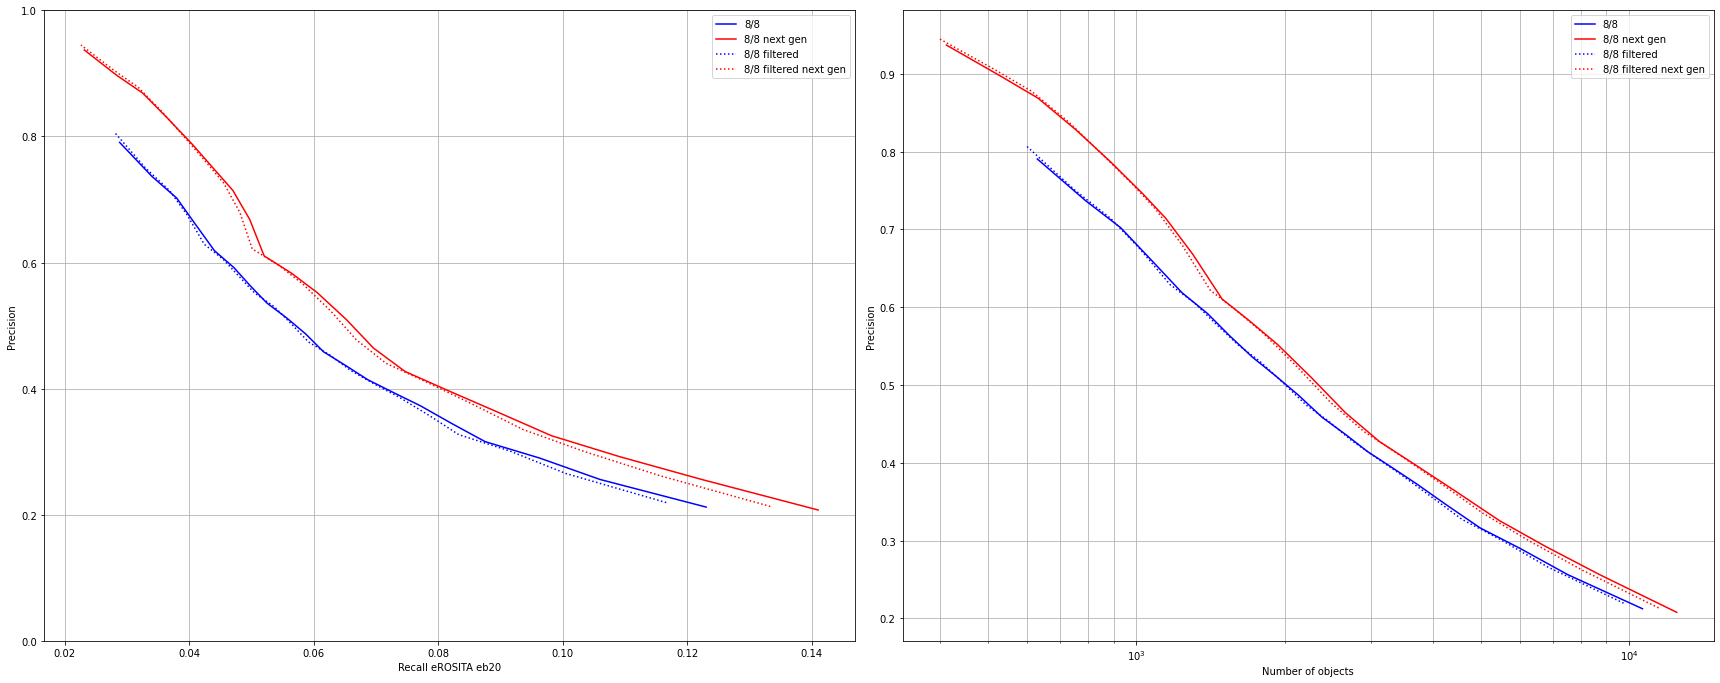

In [12]:
f, ax = get_ax(1, 2, shape=(2, 0.8))
for i, func in enumerate([show_precision_recall, show_precision_nobj]):
    for cat in selected_cats:
        func(ax[i], true_name="eROSITA", cm=cm_dicts[cat], add_other=True)
    setup_ax(ax[i])
ax[1].set_xscale("log")
ax[1].grid(which="minor")
f.tight_layout()

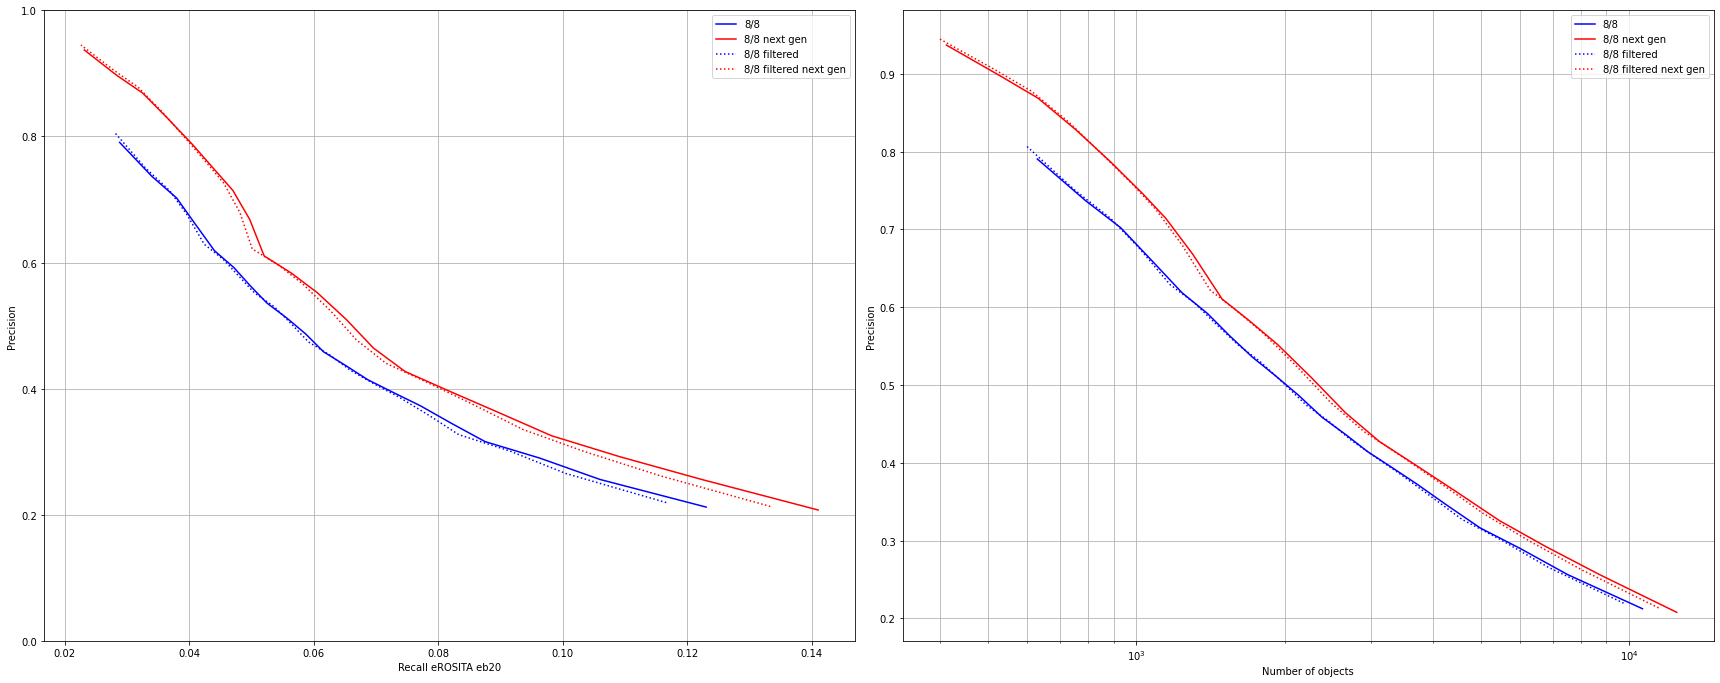

In [13]:
f, ax = get_ax(1, 2, shape=(2, 0.8))
for i, func in enumerate([show_precision_recall, show_precision_nobj]):
    for cat in selected_cats:
        func(ax[i], true_name="eROSITA", cm=cm_dicts[cat], add_other=True, tag="")
    setup_ax(ax[i])
ax[1].set_xscale("log")
ax[1].grid(which="minor")
f.tight_layout()

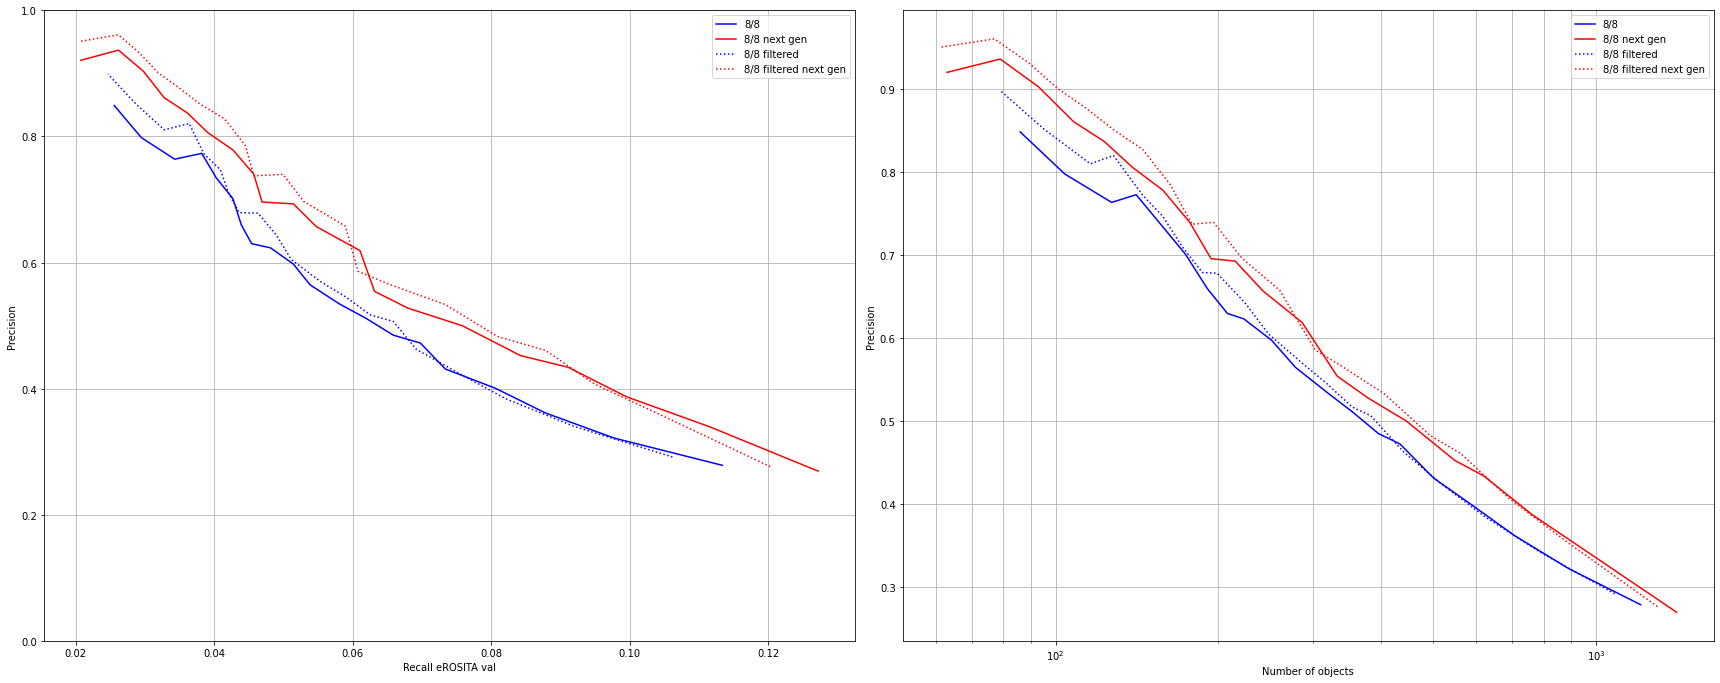

In [14]:
f, ax = get_ax(1, 2, shape=(2, 0.8))
for i, func in enumerate([show_precision_recall, show_precision_nobj]):
    for cat in selected_cats:
        func(ax[i], true_name="eROSITA", cm=cm_dicts[cat], add_other=True, tag="_val")
    setup_ax(ax[i])
ax[1].set_xscale("log")
ax[1].grid(which="minor")
f.tight_layout()

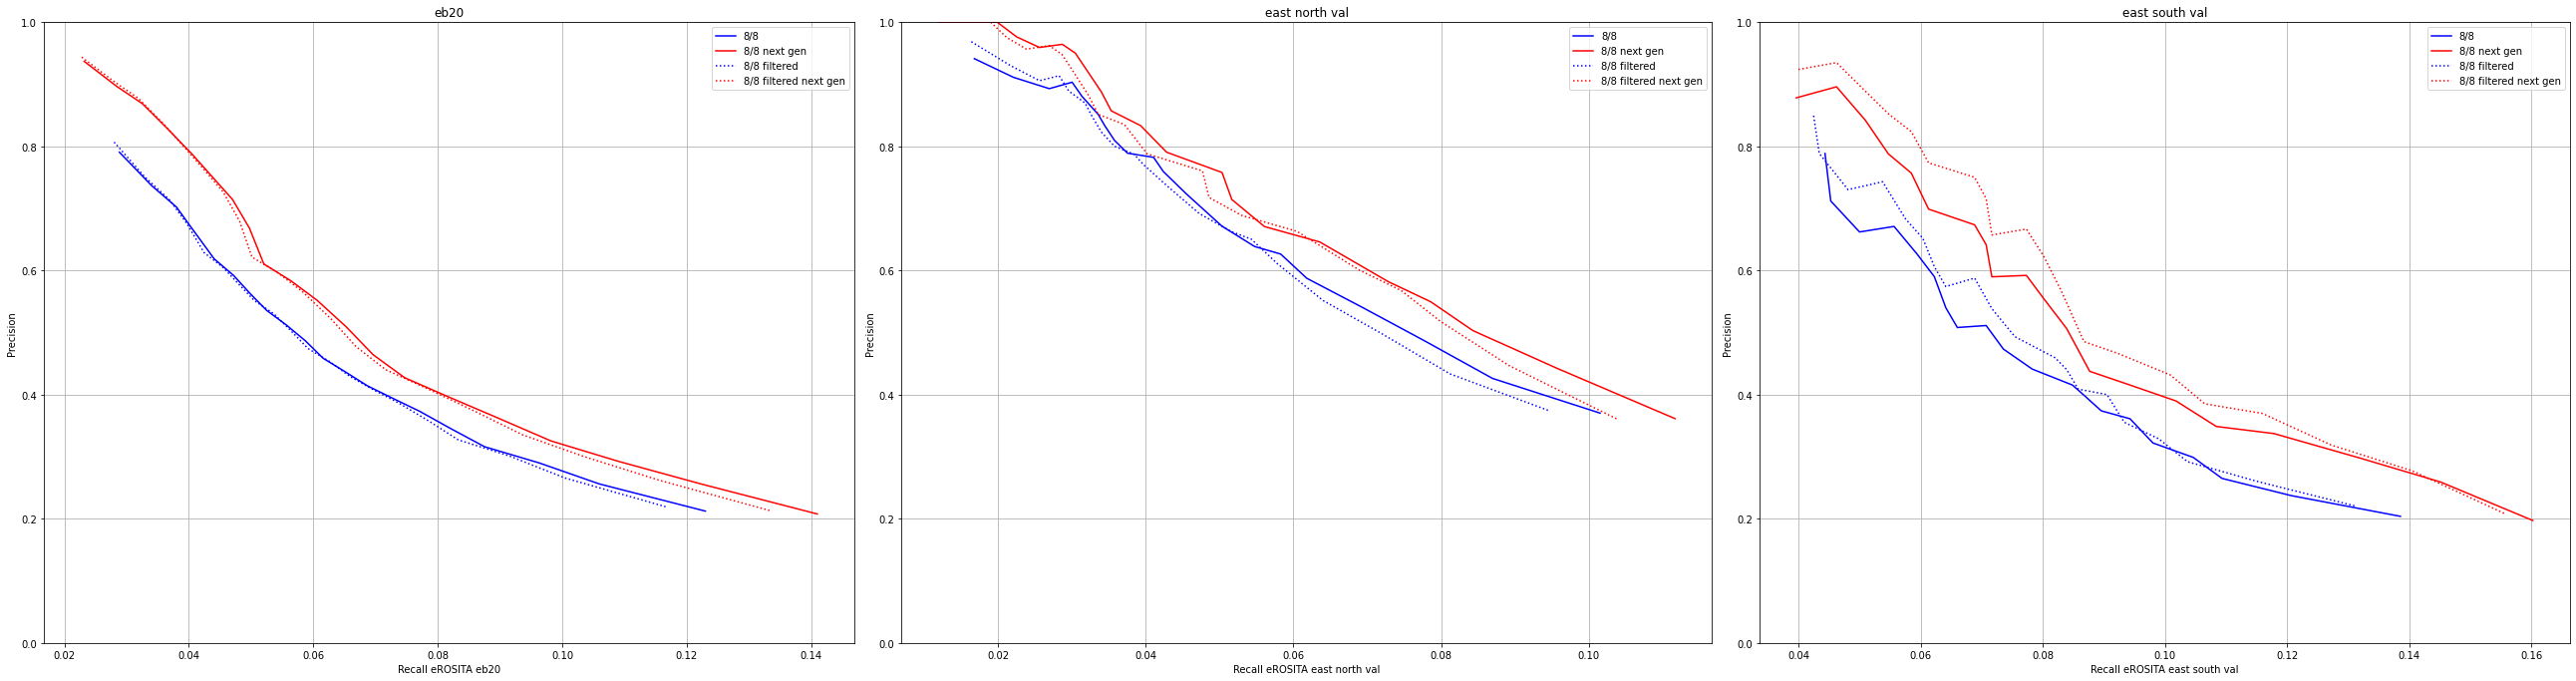

In [15]:
f, ax = get_ax(1, 3, shape=(3, 0.8))
for i, tag in enumerate(["", "_en", "_es"]):
    for cat in selected_cats:
        show_precision_recall(ax[i], true_name="eROSITA", cm=cm_dicts[cat], add_other=True, tag=tag)
    setup_ax(ax[i])
    ax[i].set_title(field_names_dict[tag])
f.tight_layout()

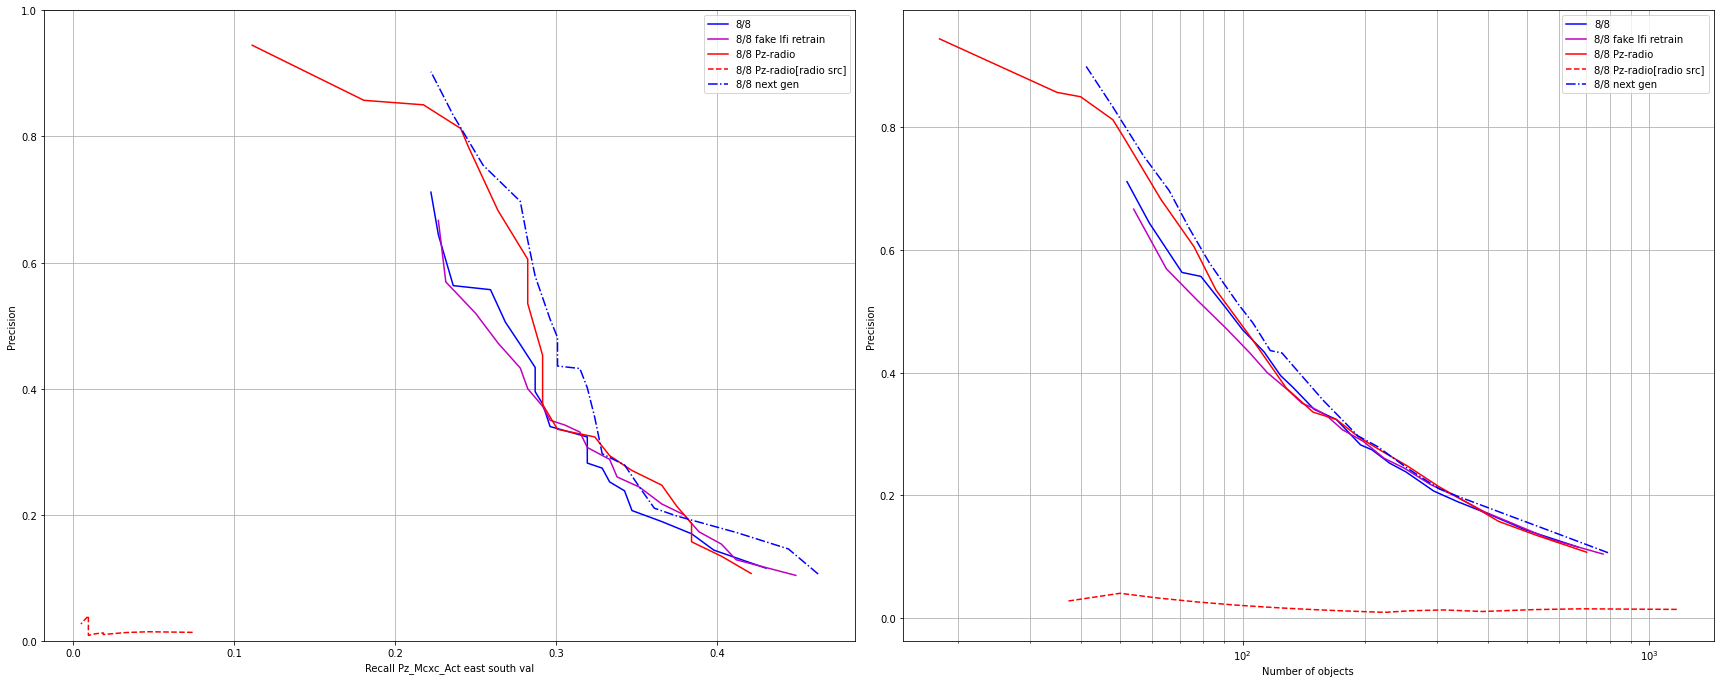

In [158]:
f, ax = get_ax(1, 2, shape=(2, 0.8))
for i, func in enumerate([show_precision_recall, show_precision_nobj]):
    for cat in selected_cats:
        func(ax[i], true_name="Pz_Mcxc_Act", cm=cm_dicts[cat], add_other=True, tag="_es")
    setup_ax(ax[i])
ax[1].set_xscale("log")
ax[1].grid(which="minor")
f.tight_layout()

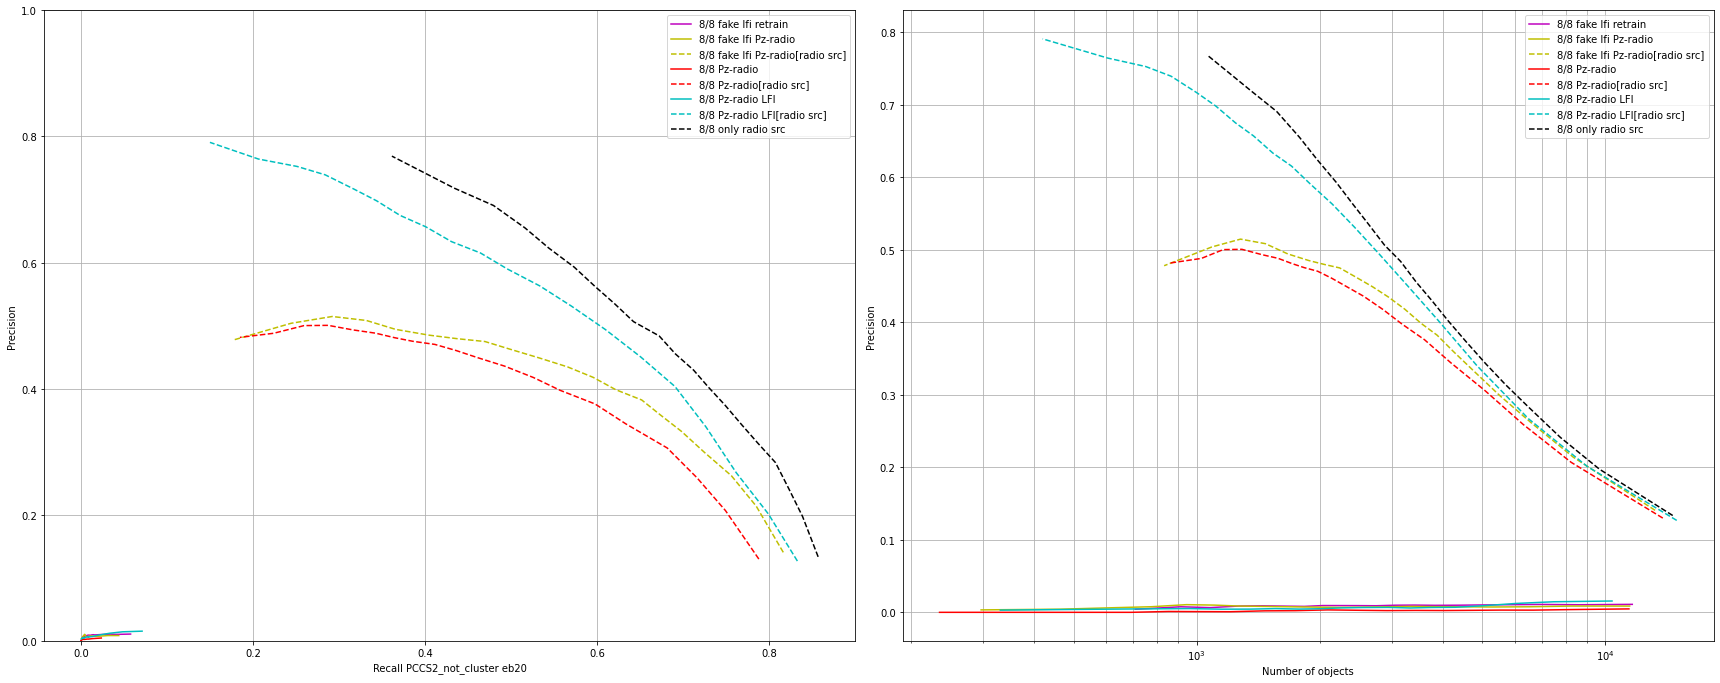

In [151]:
f, ax = get_ax(1, 2, shape=(2, 0.8))
for i, func in enumerate([show_precision_recall, show_precision_nobj]):
    for cat in selected_cats:
        func(ax[i], true_name="PCCS2_not_cluster", cm=cm_dicts[cat], add_other=True, tag="")
    setup_ax(ax[i])
ax[1].set_xscale("log")
ax[1].grid(which="minor")
f.tight_layout()

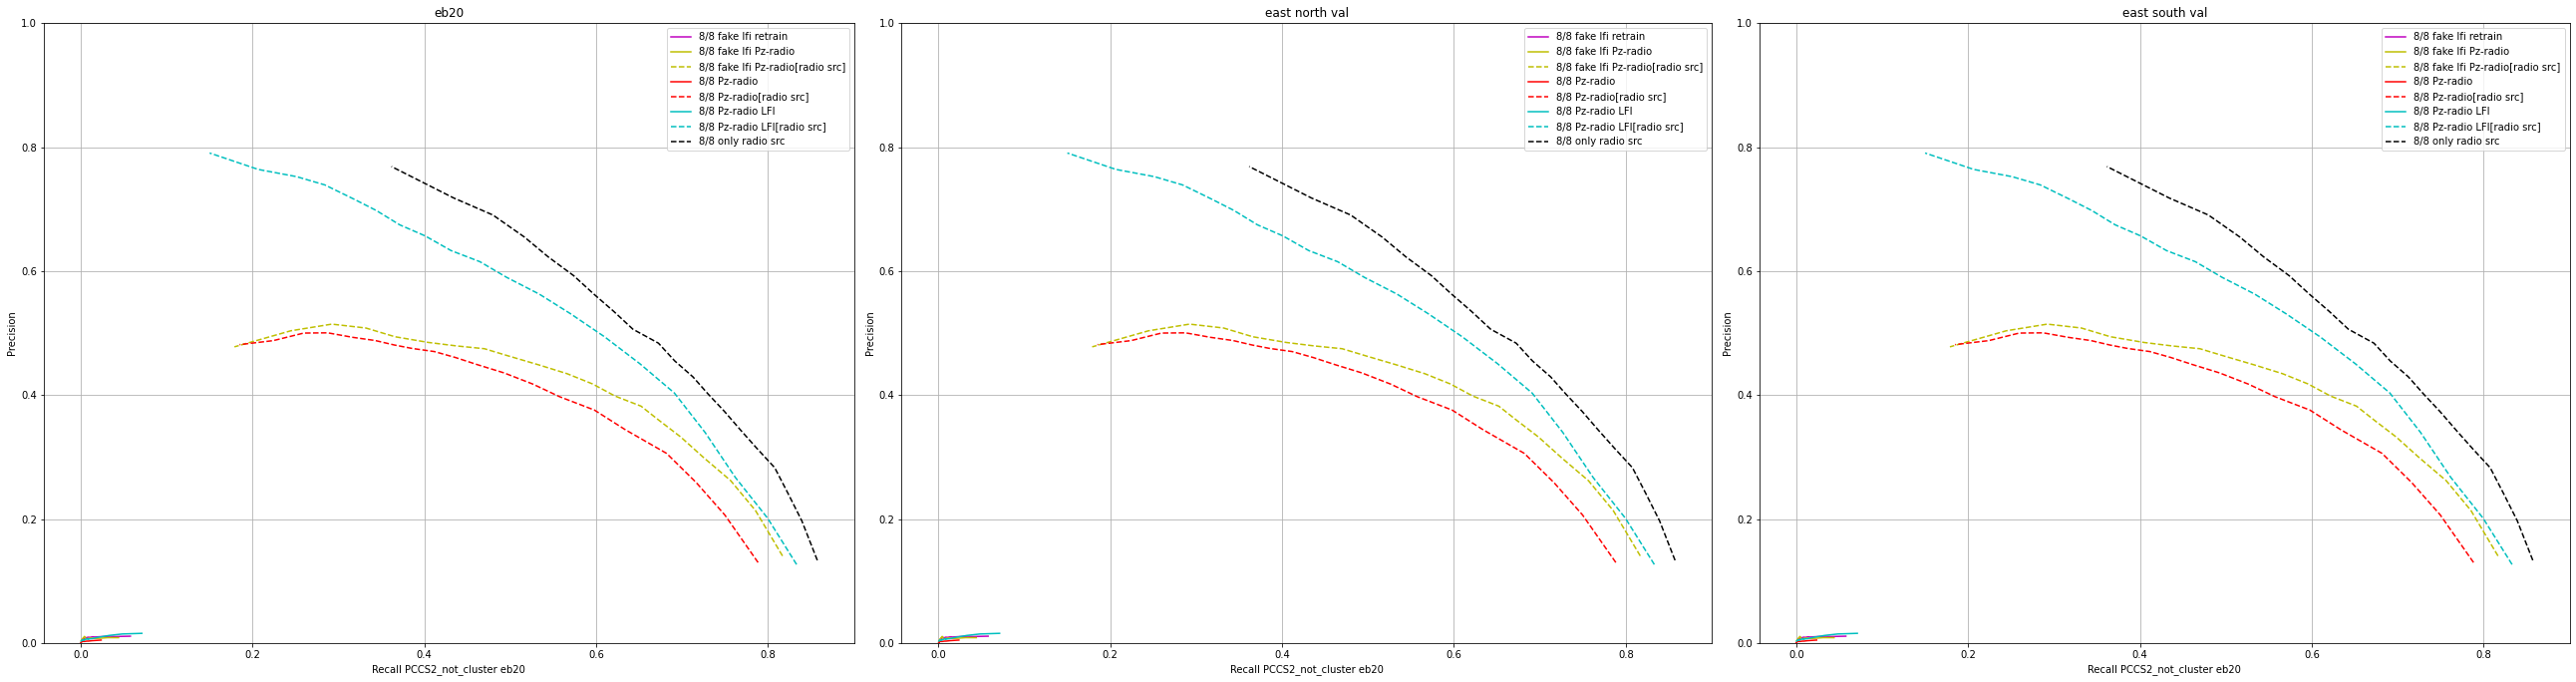

In [152]:
f, ax = get_ax(1, 3, shape=(3, 0.8))
for i, tag in enumerate(["", "_en", "_es"]):
    for cat in selected_cats:
        show_precision_recall(ax[i], true_name="PCCS2_not_cluster", cm=cm_dicts[cat], add_other=True, tag="")
    setup_ax(ax[i])
    ax[i].set_title(field_names_dict[tag])
f.tight_layout()

In [134]:

            #"/home/alisa/Data/Planck/metr/stat_brcat{}.csv",
            #("/home/alisa/Data/Planck/metr/stat_HAD{}.csv", "", "m", "dashed"),
            #"/home/alisa/Data/Planck/old/metr/stat_pz-aug_ep98_step16{}.csv",
            #"/home/alisa/Data/Planck/old/metr/stat_al2-pr_ep067_step16{}.csv",
             #"/home/alisa/Data/Planck/metr/stat_Pz_ep021_step16{}.csv",
             #"/home/alisa/Data/Planck/metr/stat_Pz1_ep029_step16{}.csv",
            #"/home/alisa/Data/Planck/metr/stat_Pz2_ep012_step16{}.csv",
            #"/home/alisa/Data/Planck/metr/stat_Pz3_ep006_step16{}.csv",
            #"/home/alisa/Data/Planck/metr/stat_Pz4_ep022_step16{}.csv",
            #"/home/alisa/Data/Planck/metr/stat_Pz5_ep024_step16{}.csv",
            #"/home/alisa/Data/Planck/metr/stat_Pz6_ep034_step16{}.csv",
            #"/home/alisa/Data/Planck/metr/stat_Pz7_ep034_step16{}.csv",
            #("/home/alisa/Data/Planck/metr/stat_Pz8_ep073_step16{}.csv", "8/256 filters 5 blocks", "y", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_pz9_1_ep117_step16{}.csv", "8/8 1", "b", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_pz9_2_ep148_step16{}.csv", "8/8 2", "c", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Pz10_ep079_step16{}.csv","16/16", "y", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Pz11_ep017_step16{}.csv", "64/64 filters 5 blocks", "b", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Pz16_ep015_step16{}.csv", "128/128", "m", "solid"),
    
            #("/home/alisa/Data/Planck/metr/stat_Al7_ep040_step16{}.csv", "8/256 next gen", "g", "dashed"),
            #("/home/alisa/Data/Planck/metr/stat_Al6_ep021_step16{}.csv", "64/64 next gen", "b", "dashed"),
            #"/home/alisa/Data/Planck/metr/stat_Pz12_ep023_step16{}.csv",
            #("/home/alisa/Data/Planck/metr/stat_Pz13_ep139_step16{}.csv", "4/4", "m", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Pz14_ep139_step16{}.csv", "2/2", "c", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Pz15_ep019_step16{}.csv", "32/32", "sienna", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Al8_ep137_step16{}.csv", "16/16 next gen", "y", "dashed"),
            #("/home/alisa/Data/Planck/metr/stat_Al9_ep028_step16{}.csv", "32/32 next gen", "sienna", "dashed"),
            #("/home/alisa/Data/Planck/metr/stat_Al10_ep007_step16{}.csv", "128/128 next gen", "m", "dashed"),
    
            #("/home/alisa/Data/Planck/metr/stat_pz11-lfi_ep018_step16{}.csv", "64/64", "m", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_pz9-lfi_ep126_step64{}.csv", "8/8 step64", "m", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_pz9-lfi_ep126_stepfast{}.csv", "8/8 fast", "m", "-."),
            #("/home/alisa/Data/Planck/metr/stat_pz11-lfi_ep018_stepfast{}.csv", "64/64 fast", "c", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_pz8-lfi_ep040_stepfast{}.csv", "8/256 fast", "c", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Pz10-lfi_ep067_stepfast{}.csv", "16/16 fast", "gray", "solid"),
            #("/home/alisa/Data/Planck/metr/stat_Al11-lfi_ep019_stepfast{}.csv", "8/8 2nd generation", "m", ":"),
            #("/home/alisa/Data/Planck/metr/stat_Pz9_ep119_stepfast{}.csv", "8/8 fast", "r", "-."),
            #("/home/alisa/Data/Planck/metr/stat_Al12-lfi_ep073_step16{}.csv", "8/8 next gen", "m", "dashed"),


In [135]:

not_cluster_cats = [
    #("/home/alisa/Data/Planck/metr/stat_pz-not-cluster_8-256_ep040_step16{}_class1.csv", "8/256", "b", "solid"),
    #("/home/alisa/Data/Planck/metr/stat_pz-not-cluster-lfi_8-256_ep029_step16{}_class1.csv", "8/256", "g", "solid"),
    #("/home/alisa/Data/Planck/metr/stat_pz-not-cluster_8-8_ep139_step16{}_class1.csv", "8/8", "b", "solid"),
    #("/home/alisa/Data/Planck/metr/stat_pz-not-cluster-lfi_8-8_ep135_step16{}_class1.csv", "8/8", "lime", "solid"),
    #("/home/alisa/Data/Planck/metr/stat_pz-frlfi_8-8_ep062_step16{}_class1.csv", "8/8 fake lfi retrain", "lime", "solid"),
    ("/home/alisa/Data/Planck/metr/stat_pz-not-cluster-frlfi_8-8_ep083_step16{}_class1.csv", "fr lfi retrain 8/8", "indigo", "solid"),
]

In [136]:

dicts = {}
colors = []
linestyles = []
for tag in tags:
    cur_d = {}
    for cat, descr, c, ls in main_cats:
        name = get_name(cat)
        name = name[:name.find('_')] + " " + descr
        cur_d[name] = cat.format(tag)
        colors.append(c)
        linestyles.append(ls)
    dicts[tag] = cur_d

NameError: name 'main_cats' is not defined